# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．
なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
import MeCab

_m = MeCab.Tagger()
with open("neko.txt", encoding='utf-8') as input_file:
    with open("neko.txt.mecab", mode='w', encoding='utf-8') as output_file:
        output_file.write(_m.parse(input_file.read()))

##### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
morph_data = list()
with open("neko.txt.mecab", mode='r', encoding='utf-8') as input_file:
    for line in input_file:
        features = line.split("\t")
        if len(features) == 2:
            sub_features = features[1].split(",")
            dic = {'surface': features[0], 'base': sub_features[6], 'pos': sub_features[0], 'pos1': sub_features[1]}
        morph_data.append(dic)

##### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [3]:
verbs_surface_data = [verb["surface"] for verb in morph_data if verb["pos"] == "動詞"]

##### 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [4]:
verbs_base_data = [verb["base"] for verb in morph_data if verb["pos"] == "動詞"]

##### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [5]:
conj_sa_data = [verb["surface"] for verb in morph_data if verb["pos1"] == "サ変接続"]

##### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
rentai_data = [morph_data[i-1]["surface"] + morph_data[i]["surface"] + morph_data[i+1]["surface"] for i in range(len(morph_data)) if morph_data[i]["pos1"] == "連体化"]

##### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
nouns = ""
count = 0
nouns_list = list()
for morph in morph_data:
    if morph['pos'] == "名詞":
        nouns = nouns + morph['surface']
        count = count + 1
    else:
        if count > 0:
            if count > 1:
                nouns_list.append(nouns)
            nouns = ""
            count = 0

##### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
morph_sorted_dict = dict()
for morph in morph_data:
    if morph["base"] in morph_sorted_dict.keys():
        morph_sorted_dict[morph["base"]] += 1
    else:
        morph_sorted_dict[morph["base"]] = 1

morph_sorted_list = sorted(morph_sorted_dict.items(), key=lambda x: x[1], reverse=True)

##### ※ グラフを描くための準備

In [9]:
from matplotlib import pyplot as plt

# 使えるフォントを確認する時
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# フォントを設定する
plt.rcParams['font.family'] = 'HGSeikaishotaiPRO'

##### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

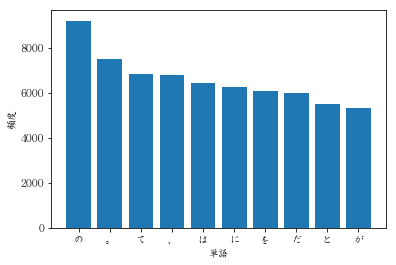

In [10]:
x = list()
y = list()
for word in morph_sorted_list[0:10]:
    x.append(word[0])
    y.append(word[1])

plt.bar(x, y)
plt.xlabel("単語")
plt.ylabel("頻度")
plt.show()

##### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

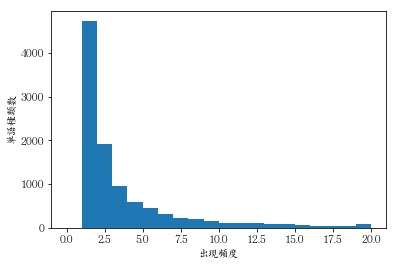

In [11]:
graph_data = [morph[1] for morph in morph_sorted_list]

plt.hist(graph_data, bins=20,  range=(0, 20))
plt.xlabel('出現頻度')
plt.ylabel('単語種類数')
plt.show()

##### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

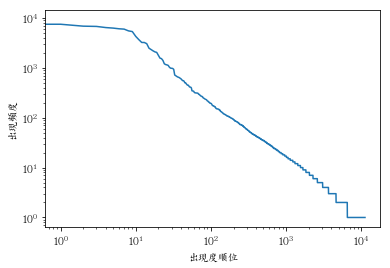

In [12]:
plt.xscale('log')
plt.yscale('log')
plt.plot(graph_data)
plt.xlabel('出現度順位')
plt.ylabel('出現頻度')
plt.show()